**Na co bacha**

- Žánry jsou spojeny s interprety, ne písněmi!

In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

In [3]:
zanry = df.explode('zanry')

In [4]:
import json

In [5]:
def ze_slovniku(slovnik, druhysloupec):
    with open(os.path.join("data_rucni",slovnik), 'r', encoding='utf-8') as file:
        frejm = pd.DataFrame(json.load(file), index=[0]).transpose().reset_index()
        frejm = frejm.rename(columns = { "index" : "zanry", 0 : druhysloupec})
    return frejm

In [6]:
zanry_kratce = ze_slovniku('zanry_klasik.json','zanry_kratce')

In [7]:
zanry_prvky = ze_slovniku('zanry_prvky.json','zanry_prvky')

In [8]:
zanry = zanry.merge(zanry_kratce, on='zanry', how="outer")
zanry = zanry.merge(zanry_prvky, on='zanry', how="outer")

## Nejzastoupenější žánry

In [9]:
zanry.groupby('zanry').size().nlargest(20)

zanry
pop music                     31700
pop rock                      14917
hip hop                       12030
contemporary R&B              10638
alternativní rock             10257
rock                           9754
elektropop                     9705
dance-pop                      7897
elektronická taneční hudba     7605
synthpop                       5939
house music                    5799
electro house                  5753
taneční hudba                  5679
progressive house              4431
rhythm and blues               4053
soul                           3798
indie pop                      3466
elektronická hudba             3278
pop rap                        3006
reggae                         2992
dtype: int64

In [10]:
# zanry.groupby('zanry').size().sort_values(ascending=False).to_json(os.path.join("data_raw","zanry_pro_anet.json"), indent = 4, force_ascii=False)

## Zastoupenost jednotlivých žánrů v čase: varianta "obsahuje"

In [11]:
def podil(z,p):
    z = z.lower()
    if isinstance(z, str):
        vyvoj = zanry[(zanry['zanry'].str.lower().str.contains(z,na=False)) & (zanry['pozice'] <= p)].groupby('rok').size() / df[df['pozice'] <= p].groupby('rok').size()
        vyvoj.plot.bar()
    if isinstance(z, list):
        vyvoj = "Toto zatím neumím."
    
    return (vyvoj)

Funkce vybírá všechny řádky obsahující řetězec ("pop" vrátí i "pop rock") a podělí je počtem písniček za daný rok. Druhý parametr filtruje pozice v žebříčku.

rok
2006.0    0.957843
2007.0    0.996275
2008.0    0.742308
2009.0    0.577255
2010.0    0.457692
2011.0    0.457000
2012.0    0.551373
2013.0    0.573725
2014.0    0.623200
2015.0    0.500962
2016.0    0.396275
2017.0    0.517308
2018.0    0.475000
2019.0    0.423137
2020.0    0.303529
2021.0    0.339020
2022.0    0.504118
2023.0    0.487857
dtype: float64

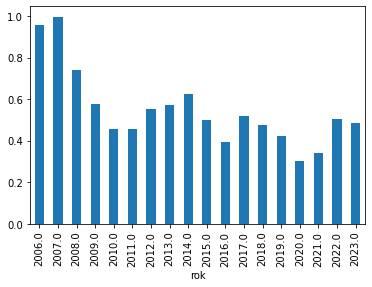

In [12]:
podil('rock',100)

rok
2006.0    0.159608
2007.0    0.140196
2008.0    0.185769
2009.0    0.301765
2010.0    0.357885
2011.0    0.375600
2012.0    0.251373
2013.0    0.265686
2014.0    0.212000
2015.0    0.137500
2016.0    0.122157
2017.0    0.131538
2018.0    0.123200
2019.0    0.074118
2020.0    0.062941
2021.0    0.083137
2022.0    0.069412
2023.0    0.093095
dtype: float64

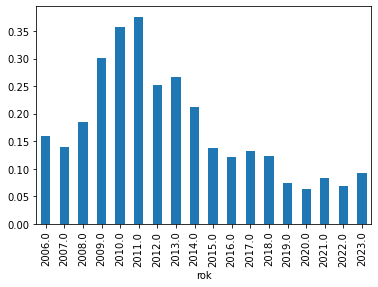

In [13]:
podil('hip hop',100)

rok
2006.0    0.119020
2007.0    0.125294
2008.0    0.120385
2009.0    0.161373
2010.0    0.172692
2011.0    0.177200
2012.0    0.149020
2013.0    0.108627
2014.0    0.098600
2015.0    0.096731
2016.0    0.104706
2017.0    0.116538
2018.0    0.118200
2019.0    0.106471
2020.0    0.058824
2021.0    0.076078
2022.0    0.099804
2023.0    0.122143
dtype: float64

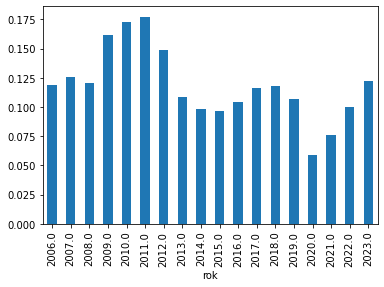

In [14]:
podil('rap',100)

rok
2006.0    0.043333
2007.0    0.078039
2008.0    0.071538
2009.0    0.132941
2010.0    0.244231
2011.0    0.341600
2012.0    0.304510
2013.0    0.299412
2014.0    0.357800
2015.0    0.440962
2016.0    0.448431
2017.0    0.441731
2018.0    0.305400
2019.0    0.372549
2020.0    0.346275
2021.0    0.242745
2022.0    0.319216
2023.0    0.191429
dtype: float64

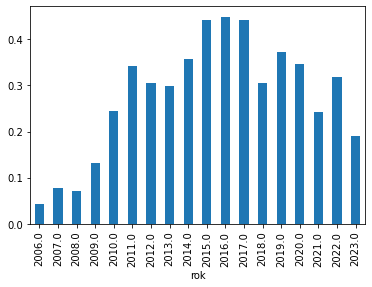

In [15]:
podil('house',100)

rok
2006.0         NaN
2007.0    0.000392
2008.0         NaN
2009.0    0.002745
2010.0    0.006154
2011.0    0.002600
2012.0    0.001373
2013.0    0.000980
2014.0    0.001800
2015.0    0.000192
2016.0    0.000588
2017.0    0.000769
2018.0         NaN
2019.0    0.002353
2020.0         NaN
2021.0         NaN
2022.0         NaN
2023.0         NaN
dtype: float64

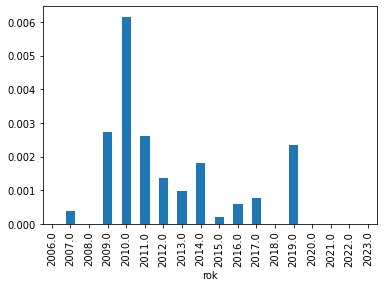

In [16]:
podil('swing',100)

rok
2006.0    0.176667
2007.0    0.192745
2008.0    0.175192
2009.0    0.157647
2010.0    0.182308
2011.0    0.160200
2012.0    0.132549
2013.0    0.116863
2014.0    0.099800
2015.0    0.111346
2016.0    0.129412
2017.0    0.081154
2018.0    0.113000
2019.0    0.067059
2020.0    0.113137
2021.0    0.104706
2022.0    0.058431
2023.0    0.060238
dtype: float64

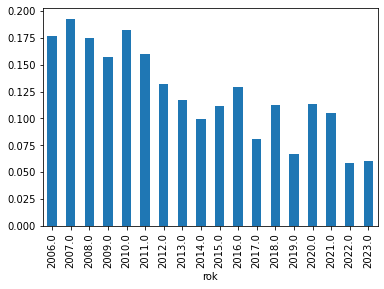

In [17]:
podil('R&B',100)

rok
2006.0    0.045490
2007.0    0.057451
2008.0    0.079423
2009.0    0.049020
2010.0    0.056538
2011.0    0.073400
2012.0    0.095294
2013.0    0.096078
2014.0    0.072400
2015.0    0.079038
2016.0    0.082941
2017.0    0.055192
2018.0    0.030800
2019.0    0.028824
2020.0    0.045490
2021.0    0.026275
2022.0    0.056863
2023.0    0.040952
dtype: float64

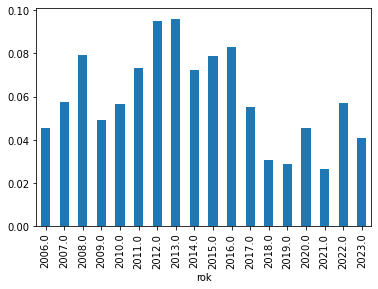

In [18]:
podil('soul',100)

## Zastoupenost jednotlivých žánrů v čase: ručně sgrupnuté žánry

In [19]:
zanry['zanry_kratce'].drop_duplicates().to_list()

['pop',
 'elektronická taneční hudba',
 'elektronická hudba',
 'rock',
 'soul a R&B',
 'jazz',
 'folk a country',
 'latinskoamerická hudba',
 nan,
 'hip hop a rap',
 'jamajská hudba',
 'různé',
 'blues',
 'alternativní metal',
 'metal',
 'indie rock',
 'indie pop',
 'disco',
 'mluvené slovo',
 'alternativní hudba',
 'klasická hudba',
 'šanson',
 'filmová hudba']

In [20]:
def podil_kratce(z,p):
    z = z.lower()
    if isinstance(z, str):
        vyvoj = zanry[(zanry['zanry_kratce'] == z) & (zanry['pozice'] <= p)].drop_duplicates(subset=['interpret_hlavni','track']).groupby('rok').size() / df[df['pozice'] <= p].drop_duplicates(subset=['interpret_hlavni','track']).groupby('rok').size()
        vyvoj.plot.bar()
    if isinstance(z, list):
        vyvoj = "Toto zatím neumím."
    
    return (vyvoj)

rok
2006.0    0.056150
2007.0    0.053942
2008.0    0.039301
2009.0    0.074803
2010.0    0.029412
2011.0    0.041152
2012.0    0.044355
2013.0    0.022556
2014.0    0.075099
2015.0    0.065041
2016.0    0.037190
2017.0    0.055762
2018.0    0.040541
2019.0    0.060606
2020.0    0.043307
2021.0    0.051502
2022.0    0.055556
2023.0    0.054945
dtype: float64

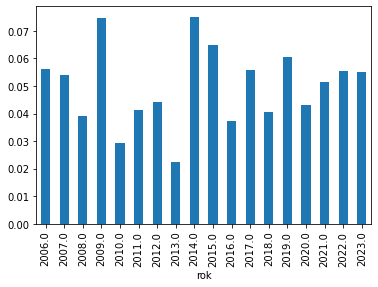

In [21]:
podil_kratce('folk a country', 100)

rok
2006.0    0.393048
2007.0    0.427386
2008.0    0.310044
2009.0    0.295276
2010.0    0.226891
2011.0    0.246914
2012.0    0.270161
2013.0    0.240602
2014.0    0.312253
2015.0    0.276423
2016.0    0.202479
2017.0    0.293680
2018.0    0.297297
2019.0    0.290043
2020.0    0.204724
2021.0    0.206009
2022.0    0.206349
2023.0    0.208791
dtype: float64

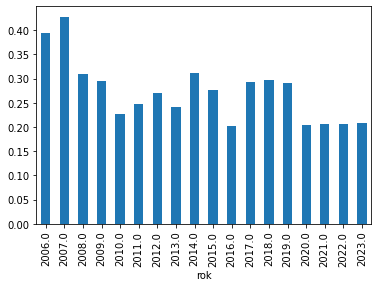

In [22]:
podil_kratce('rock', 100)

rok
2006.0    0.157754
2007.0    0.178423
2008.0    0.165939
2009.0    0.208661
2010.0    0.273109
2011.0    0.230453
2012.0    0.213710
2013.0    0.191729
2014.0    0.114625
2015.0    0.162602
2016.0    0.107438
2017.0    0.148699
2018.0    0.130631
2019.0    0.099567
2020.0    0.118110
2021.0    0.111588
2022.0    0.099206
2023.0    0.120879
dtype: float64

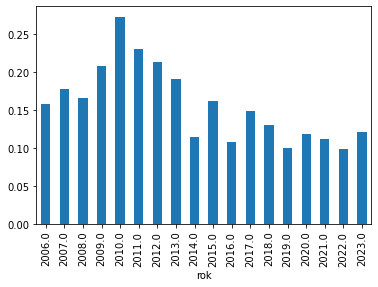

In [23]:
podil_kratce('hip hop a rap', 100)

rok
2006.0    0.371658
2007.0    0.369295
2008.0    0.432314
2009.0    0.468504
2010.0    0.453782
2011.0    0.465021
2012.0    0.471774
2013.0    0.428571
2014.0    0.407115
2015.0    0.439024
2016.0    0.450413
2017.0    0.438662
2018.0    0.369369
2019.0    0.406926
2020.0    0.354331
2021.0    0.386266
2022.0    0.301587
2023.0    0.335165
dtype: float64

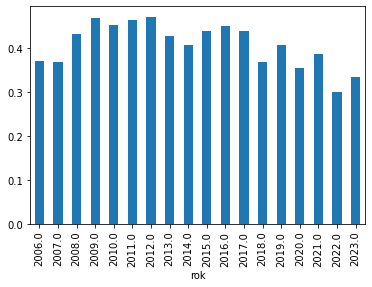

In [24]:
podil_kratce('pop', 100)

rok
2006.0    0.141711
2007.0    0.116183
2008.0    0.165939
2009.0    0.204724
2010.0    0.260504
2011.0    0.263374
2012.0    0.245968
2013.0    0.251880
2014.0    0.193676
2015.0    0.280488
2016.0    0.239669
2017.0    0.200743
2018.0    0.184685
2019.0    0.207792
2020.0    0.196850
2021.0    0.141631
2022.0    0.190476
2023.0    0.159341
dtype: float64

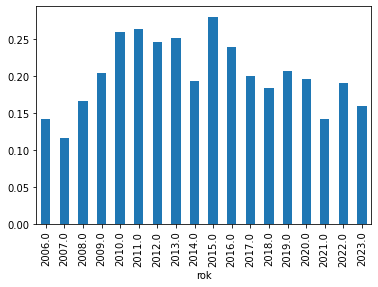

In [25]:
podil_kratce('elektronická taneční hudba', 100)

In [26]:
zanry[zanry['rok'] == 2023].groupby('zanry_kratce').size().nlargest()

zanry_kratce
pop                           2443
rock                          2308
elektronická taneční hudba    1333
hip hop a rap                  922
folk a country                 622
dtype: int64